## here is a template for real time convulotional filters

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

In [9]:
class FIR_filter_1:
    
    def __init__(self, cutoff, slope, M, samplerate, passes=1, style='bandpass'):
        self.cutoff = cutoff
        self.slope = slope
        self.M = M
        self.samplerate = samplerate
        self.passes = passes
        self.style = style
        
        self.window = self.make_window()
        
        self.i_r = np.fft.ifft(self.window)
        self.B = np.real(self.i_r[:self.M])

        
        return
    
    def process(self, signal):
        
        output = np.full(len(signal), 0.0)
        
        for N in range(self.M, len(signal)):
            for K in range(self.M):
                output[N] += self.B[K] * signal[N - K]
        
        return output

    
    def make_window(self):
        '''
        converts the given values into a window based on hanning
        
        current bandp and band s ar uninterupted curves
        
        also lp and hp are all curves
        
        need another arg?
        '''
        if self.style == 'bandpass':
            window = np.append(np.full(self.cutoff - (self.slope), 0), np.hanning(self.slope*2))
            
            
        elif self.style == 'bandstop':
            window = np.append(np.full(self.cutoff - (self.slope), 1), 1 - np.hanning(self.slope*2))
            window = np.append(window, np.full(self.samplerate-(self.cutoff - (self.slope)), 1))
                               
        elif self.style == 'lowpass':
            window = np.append(np.full(self.cutoff, 1), np.hanning(self.slope*2)[self.slope:])
            window = np.append(window, np.full(self.samplerate - self.cutoff - self.slope, 0))
            
        elif self.style == 'highpass':
            window = np.append(np.full(self.cutoff - self.slope, 0), np.hanning(self.slope*2)[:self.slope])
            window = np.append(window, np.full(self.samplerate - self.cutoff, 1))
            
        else:
            return None
        
        return window
        
    def print_window(self):
        """
        prints the window, its impules responce and its freq resonce
        """
        plt.plot(self.window)
        plt.show()
        
        i_r = np.fft.ifft(self.window)
        plt.plot(i_r)
        plt.show()
        
        return
    
        
    def set_cuttoff(self, val):
        self.cutoff = val
    
    def set_M(self, val):
        self.M = val
        
    def set_slope(self, val):
        self.slope = val
        
    def set_passes(self, val):
        self.passes = val
    
        
        

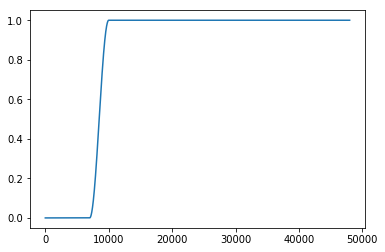

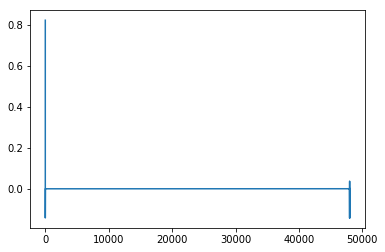

In [10]:
fir = FIR_filter_1(10000, 3000, 5, 48000, style='highpass')
fir.print_window()

# Im going to compare this windowing method to some others

this will get very codey, but scroll down to the bottem to view the results

In [11]:
#this windowing method is a sligt variation of the first
class FIR_filter_2:
    
    def __init__(self, cutoff, slope, M, samplerate, passes=1, style='bandpass'):
        self.cutoff = cutoff
        self.slope = slope
        self.M = M
        self.samplerate = samplerate
        self.passes = passes
        self.style = style
        
        self.window = self.make_window()
        
        self.i_r = np.fft.ifft(self.window)
        self.B = np.real(self.i_r[:self.M])

        
        return
    
    def process(self, signal):
        
        output = np.full(len(signal), 0.0)
        
        for N in range(self.M, len(signal)):
            for K in range(self.M):
                output[N] += self.B[K] * signal[N - K]
        
        return output
    
    
    def make_window(self):
        '''
        converts the given values into a window based on hanning
        
        current bandp and band s ar uninterupted curves
        
        also lp and hp are all curves
        
        need another arg?
        '''
        if self.style == 'bandpass':
            window = np.append(np.full(self.cutoff - (self.slope), 0), np.hanning(self.slope*2))
            
            
        elif self.style == 'bandstop':
            window = np.append(np.full(self.cutoff - (self.slope), 1), 1 - np.hanning(self.slope*2))
            window = np.append(window, np.full(self.samplerate-(self.cutoff - (self.slope)), 1))
                               
        elif self.style == 'lowpass':
            window = np.append(np.full(self.cutoff, 1), np.hanning(self.slope*2)[self.slope:])
            window = np.append(window, np.full(self.samplerate - self.cutoff - self.slope, 0))
            
        elif self.style == 'highpass':
            window = np.append(np.full(self.cutoff - self.slope, 0), np.hanning(self.slope*2)[:self.slope])
            window = np.append(window, np.full(self.samplerate - self.cutoff, 1))
            
        else:
            return None
        
        return window
        
    def print_window(self):
        """
        prints the window, its impules responce and its freq resonce
        """
        plt.plot(self.window)
        plt.show()
        
        i_r = np.fft.ifft(self.window)
        
        #here check when 0's start
        count = 0
        for i in range(len(i_r)):
            if i_r[i] <= 0.001:
                count += 1
            else:
                count = 0
            if count == 5:
                M=i
                break
        
        print('M={}'.format(M))
        i_r = np.append(i_r[len(i_r)-M:], i_r[:len(i_r)-M]) 
            
        plt.plot(i_r)
        plt.show()
        
        return
    
        
    def set_cuttoff(self, val):
        self.cutoff = val
    
    def set_M(self, val):
        self.M = val
        
    def set_slope(self, val):
        self.slope = val
        
    def set_passes(self, val):
        self.passes = val
    
        
    

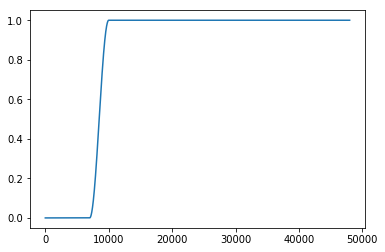

M=21


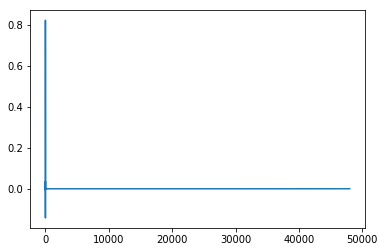

In [12]:
fir = FIR_filter_2(10000, 3000, 5, 48000, style='highpass')
fir.print_window()

In [22]:
#the third is useing the sinc function to build a window int the time domain

class FIR_filter_3:
    
    def __init__(self, cutoff, num_coef, samplerate):
        #self.fc = 0.2  # Cutoff frequency as a fraction of the sampling rate (in (0, 0.5)).
        self.fc = cutoff / (samplerate)
        print('fc: {}'.format(self.fc))
        self.N = num_coef   # Number of coefficients.
        L = samplerate  # Length of frequency response.
     
        # Compute sinc filter with Hamming window.
        n = np.arange(self.N)
        h = np.sinc(2 * self.fc * (n - (self.N - 1) / 2)) * np.hamming(self.N)
        h /= np.sum(h)
        plt.plot(h)
        plt.show()
 
        # Pad filter with zeros.
        h_padded = np.zeros(L)
        h_padded[0 : self.N] = h
        plt.plot(h_padded)
        plt.show()
        
        self.B= h
        self.M = len(self.B)
 
        # Compute frequency response; only keep first half.
        H = np.abs(np.fft.fft(h_padded))[0 : L // 2 + 1]
 
        # Plot frequency response (in dB).
        plt.figure()
        plt.plot(20 * np.log10(H))
        plt.xlabel('Normalized frequency')
        plt.ylabel('Gain [dB]')
        plt.ylim([-100, 10])
        plt.grid()
        plt.show()
        
        return
    
    def process(self, signal):
        
        output = np.full(len(signal), 0.0)
        print(self.B)
        print(self.M)
        for N in range(self.M, len(signal)):
            
            for K in range(self.M):
                output[N] += self.B[K] * signal[N - K]
        return output

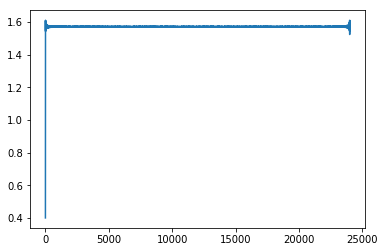

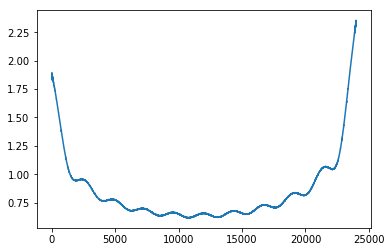

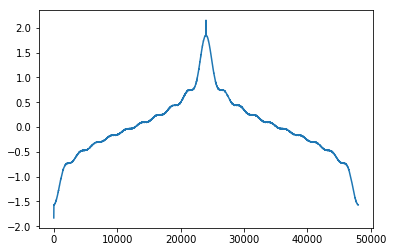

fc: 0.20833333333333334


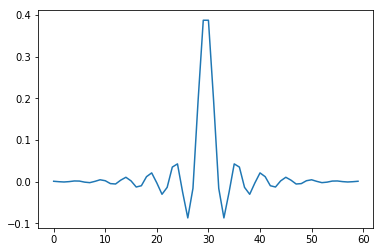

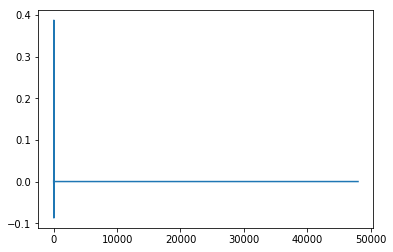

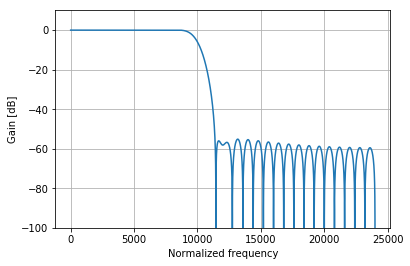

[ 6.84831040e-04 -3.53065402e-04 -1.03735261e-03 -1.61921546e-04
  1.39667971e-03  1.13642730e-03 -1.40797687e-03 -2.64022764e-03
  4.58154196e-04  4.24266996e-03  1.98088444e-03 -4.92969883e-03
 -5.87607058e-03  3.35732704e-03  1.02473418e-02  1.58237938e-03
 -1.30931365e-02 -1.00633958e-02  1.17283917e-02  2.07581015e-02
 -3.42874669e-03 -3.05955301e-02 -1.39825124e-02  3.47375898e-02
  4.23942630e-02 -2.56665587e-02 -8.73193873e-02 -1.63497191e-02
  1.94904538e-01  3.87295722e-01  3.87295722e-01  1.94904538e-01
 -1.63497191e-02 -8.73193873e-02 -2.56665587e-02  4.23942630e-02
  3.47375898e-02 -1.39825124e-02 -3.05955301e-02 -3.42874669e-03
  2.07581015e-02  1.17283917e-02 -1.00633958e-02 -1.30931365e-02
  1.58237938e-03  1.02473418e-02  3.35732704e-03 -5.87607058e-03
 -4.92969883e-03  1.98088444e-03  4.24266996e-03  4.58154196e-04
 -2.64022764e-03 -1.40797687e-03  1.13642730e-03  1.39667971e-03
 -1.61921546e-04 -1.03735261e-03 -3.53065402e-04  6.84831040e-04]
60


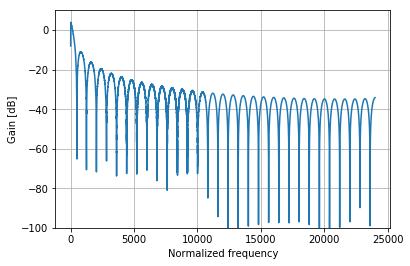

In [23]:
# here i make a white noise to measur real responce against
w_noise, x = sf.read('noise.wav')
plt.plot(np.abs(np.fft.fft(w_noise)[:x//2]))
plt.show()

filt_1 = FIR_filter_1(cutoff=10000, slope=3000, M=20, samplerate=48000, style='highpass')
filtered_1 = filt_1.process(w_noise)
plt.plot(np.abs(np.fft.fft(filtered_1))[:x//2])
plt.show()

filt_2 = FIR_filter_2(10000, 3000, 20, 48000, style='highpass')
filtered_2 = filt_2.process(w_noise)
plt.plot(np.fft.fft(filtered_2))
plt.show()

filt_3 = FIR_filter_3(10000, 60, 48000)
filtered_3 = filt_3.process(w_noise)

# Plot frequency response (in dB).
H = np.abs(np.fft.fft(filtered_3))[:x//2]
plt.figure()
plt.plot(20 * np.log10(H))
plt.xlabel('Normalized frequency')
plt.ylabel('Gain [dB]')
plt.ylim([-100, 10])
plt.grid()
plt.show()

pass